In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("raw_sales.csv",parse_dates=["datesold"])

In [3]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [4]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2
29579,2019-07-26,2612,775000,unit,2


In [5]:
df.loc[df['datesold']>'2019']

,datesold,postcode,price,propertyType,bedrooms
23531,2019-01-05,2913,550000,house,3
23532,2019-01-07,2914,468000,house,3
23533,2019-01-07,2913,980000,house,5
23534,2019-01-08,2615,460000,house,3
23535,2019-01-08,2913,603000,house,4
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [6]:
df.iloc[10]

datesold        2007-06-26 00:00:00
postcode                       2902
price                        385000
propertyType                  house
bedrooms                          3
Name: 10, dtype: object

In [7]:
df.iloc[10:15]

,datesold,postcode,price,propertyType,bedrooms
10,2007-06-26,2902,385000,house,3
11,2007-06-27,2906,305000,house,3
12,2007-06-27,2612,850000,house,4
13,2007-06-28,2904,765000,house,4
14,2007-06-30,2615,517000,house,4


In [8]:
df.price.groupby(df.bedrooms).mean()

bedrooms
0    542300.000000
1    335992.905962
2    442222.917454
3    552304.428140
4    718171.142023
5    919056.058974
Name: price, dtype: float64

In [9]:
df.price.groupby(df.bedrooms).sum()

bedrooms
0      16269000
1     546660458
2    1591118057
3    6590648741
4    7499143065
5    1792159315
Name: price, dtype: int64

In [10]:
df.describe()

,datesold,postcode,price,bedrooms
count,29580,29580.000000,2.958000e+04,29580.000000
mean,2015-02-21 07:35:42.474645248,2730.249730,6.097363e+05,3.250169
min,2007-02-07 00:00:00,2600.000000,5.650000e+04,0.000000
25%,2013-02-05 00:00:00,2607.000000,4.400000e+05,3.000000
50%,2015-09-30 00:00:00,2615.000000,5.500000e+05,3.000000
75%,2017-07-26 00:00:00,2905.000000,7.050000e+05,4.000000
max,2019-07-27 00:00:00,2914.000000,8.000000e+06,5.000000
std,NaN,146.717292,2.817079e+05,0.951275


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


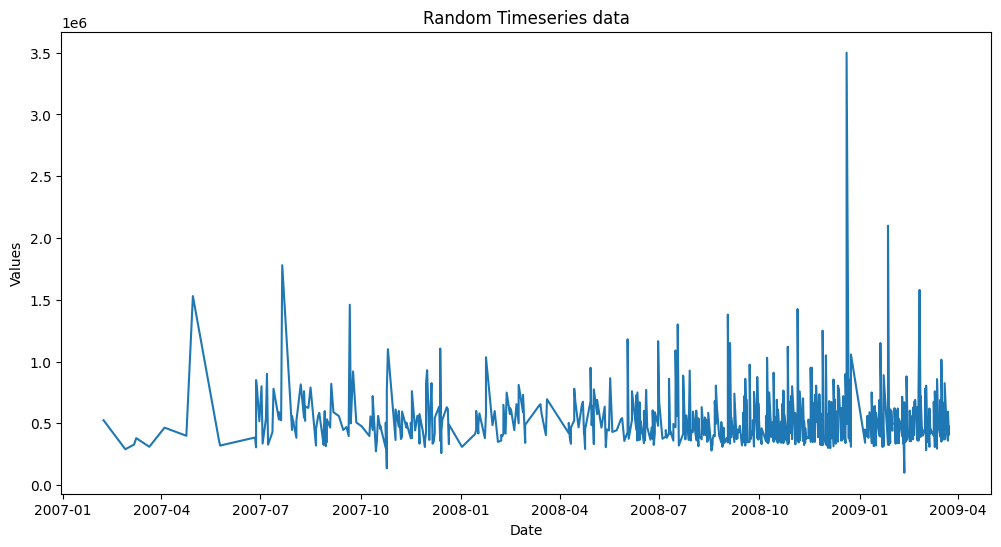

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df["datesold"].iloc[:1000],df["price"].iloc[:1000])
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Random Timeseries data')
plt.show()

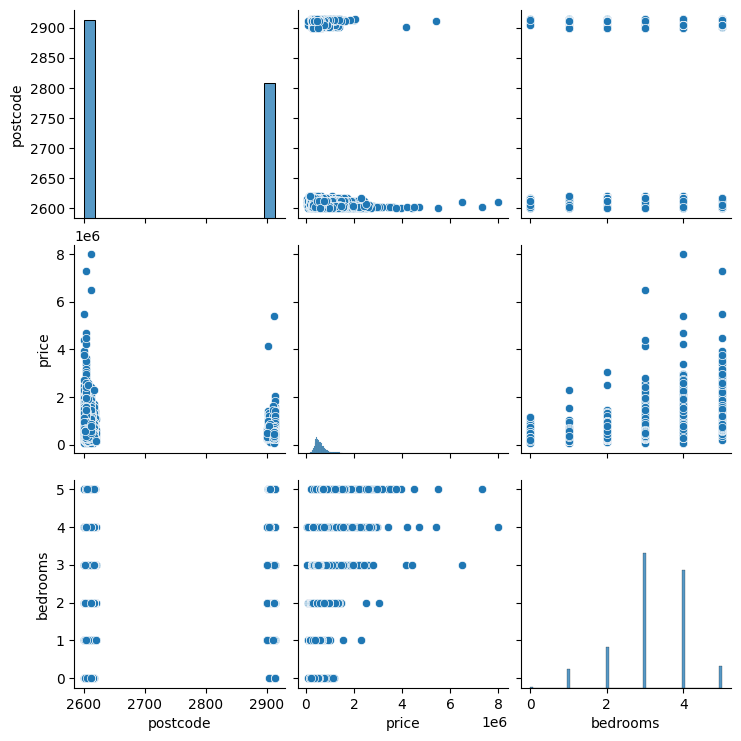

In [13]:
sns.pairplot(df)

<Axes: xlabel='bedrooms', ylabel='count'>

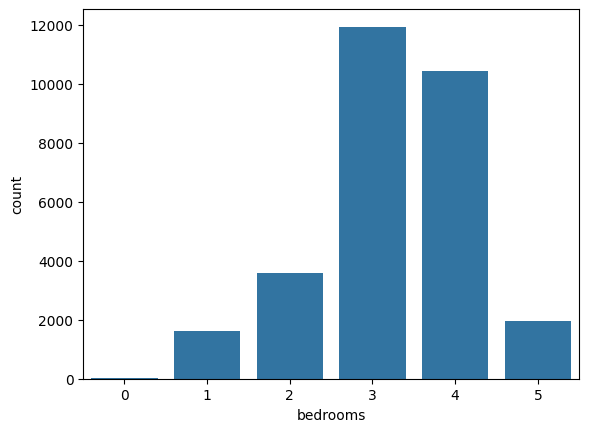

In [19]:
sns.countplot(x = df["bedrooms"])

<Axes: xlabel='bedrooms', ylabel='price'>

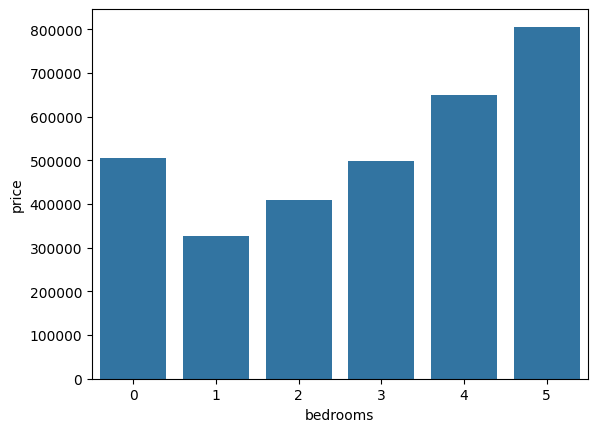

In [54]:
d = df['price'].groupby(df.bedrooms).median().reset_index()
sns.barplot(x = 'bedrooms',y = 'price', data = d)